# CMB tempurature spectral density

There are two ways we will compute CMB spectra in this class: [pypico](https://pypi.python.org/pypi/pypico) and [Class](http://class-code.net). Class directly computes the spectral densities directly (and therefore takes some time to compute). Pypico, in contrast, fits a functional interpolation scheme to precomputed spectra for fast computation (useful when running MCMC on the LCDM parameters).

This notebook will show how to use pypico and use it to explore how the tempurature spectral density changes with respect to LCDM parameters.

## Installing and wrapping pypico

The first thing you need to do to get pypico running is to follow the instructions for installation in python (here is a [link](https://pypi.python.org/pypi/pypico)). 

Part of this installation requires you to download the data interpolation files for pypico. You can get the files by following the `link` [here](https://sites.google.com/a/ucdavis.edu/pico/download).
You can automatically download these with the following Julia command. Now set the variable `picodata_path` to the path for this downloaded file.

In [9]:
picodata_path = "/Users/ethananderes/Dropbox/Courses/STA250CMB/data/pypico/pico3_tailmonty_v34.dat"

"/Users/ethananderes/Dropbox/Courses/STA250CMB/data/pypico/pico3_tailmonty_v34.dat"

Now we can load the data file into pypico using PyCall

In [12]:
using PyCall
@pyimport pypico
const picoload = pypico.load_pico(picodata_path)

# --------  wrap pico
function pico(;
        omega_b = 0.0224567, 
        omega_cdm=0.118489, 
        tau_reio = 0.128312, 
        theta_s = 0.0104098, 
        logA_s_1010 = 3.29056, 
        n_s =  0.968602 
    )
    plout::Dict{ASCIIString, Array{Float64,1}} = picoload[:get](;
        :re_optical_depth => tau_reio,
        symbol("scalar_amp(1)") =>  1e-10*exp(logA_s_1010),
        :theta => theta_s,
        :ombh2 => omega_b,
        :omch2 => omega_cdm,
        symbol("scalar_spectral_index(1)") => n_s,
        :massive_neutrinos => 3.04,
        :helium_fraction => 0.25,
        :omnuh2 => 0.0,
        symbol("scalar_nrun(1)") => 0.0,
        :force     => true
    )
    return plout 
end

pico (generic function with 1 method)

In [14]:
cls = pico()

Dict{ASCIIString,Array{Float64,1}} with 15 entries:
  "scalar_TT" => [1295.07,1270.87,1213.14,1138.87,1065.0,1005.1,959.377,925.765…
  "lensed_TE" => [-0.0,1.43604,4.36515,5.82392,6.34472,6.22473,5.73343,5.05908,…
  "pk"        => [1.98537e7,1.98535e7,1.98532e7,1.9853e7,1.98527e7,1.98524e7,1.…
  "lensed_BB" => [-2.46179e-8,6.71008e-7,2.02271e-6,4.02825e-6,6.68535e-6,9.992…
  "cl_EE"     => [0.0,0.00162267,0.0768062,0.14593,0.192574,0.203976,0.183408,0…
  "lensed_EE" => [0.0,0.00162267,0.0768062,0.14593,0.192574,0.203976,0.183408,0…
  "scalar_EE" => [0.0,0.00162095,0.0768044,0.145925,0.192565,0.203965,0.183397,…
  "cl_pp"     => [-3.16208e5,4.69586e5,1.17908e6,1.81575e6,2.38305e6,2.88509e6,…
  "cl_TE"     => [-0.0,1.43604,4.36515,5.82392,6.34472,6.22473,5.73343,5.05908,…
  "k"         => [9.99e-5,0.000104633,0.00010959,0.000114782,0.00012022,0.00012…
  "cl_TT"     => [1295.05,1270.87,1213.15,1138.87,1065.0,1005.12,959.408,925.79…
  "cl_pT"     => [3550.74,22176.5,34006.0,40755.1,44139.8

The output of pypico is a dictionary with a bunch of spectral densities. Here are the corresponding ell values for the TT spectral density.

In [29]:
ells =  collect(0:length(cls["cl_TT"])-1)

5626-element Array{Int64,1}:
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
    ⋮
 5614
 5615
 5616
 5617
 5618
 5619
 5620
 5621
 5622
 5623
 5624
 5625

#### Note: the CMB spectral densities already have a factor ell(ell+1)/(2pi). 
Therefore to get the raw tempurature spectral density you need to divide it out.

In [30]:
ellsc  = 2π ./ ells ./ (ells + 1) |> x -> (x[1] = 0; x);
rawClTT = cls["cl_TT"] .* ellsc

5626-element Array{Float64,1}:
    0.0       
 3992.57      
 1270.41      
  596.308     
  334.58      
  210.511     
  143.527     
  103.874     
   78.6844    
   61.806     
   49.9961    
   41.4209    
   35.0209    
    ⋮         
    5.98833e-8
    5.97982e-8
    5.97133e-8
    5.96285e-8
    5.95439e-8
    5.94595e-8
    5.93753e-8
    5.92912e-8
    5.92073e-8
    5.91236e-8
    5.90401e-8
    5.89567e-8

## Common scales for plotting C_l^TT

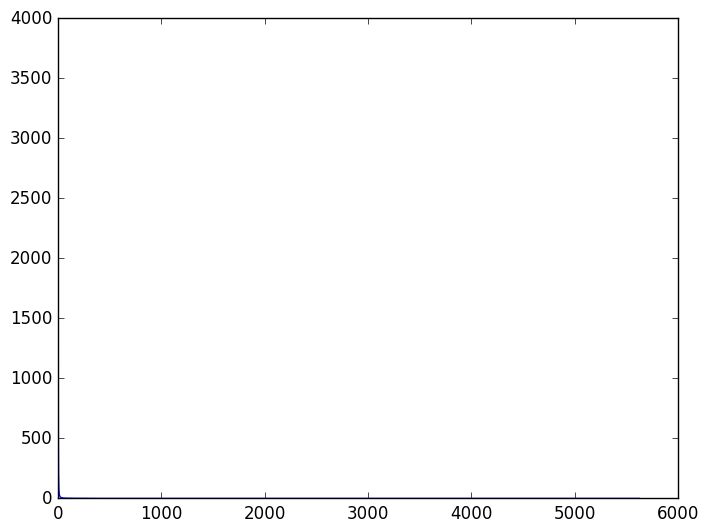

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f7a2090>

In [38]:
using PyPlot
plot(ells, rawClTT) #<---plotting the raw cls looks like a spike

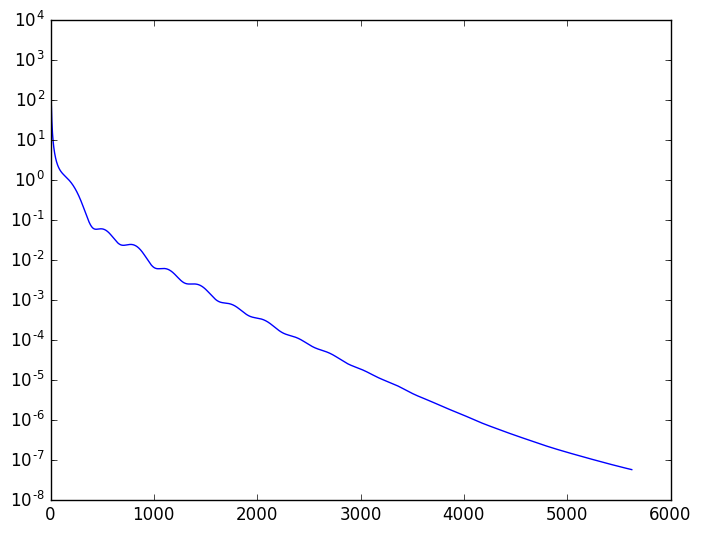

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320368a90>

In [39]:
semilogy(ells, rawClTT)

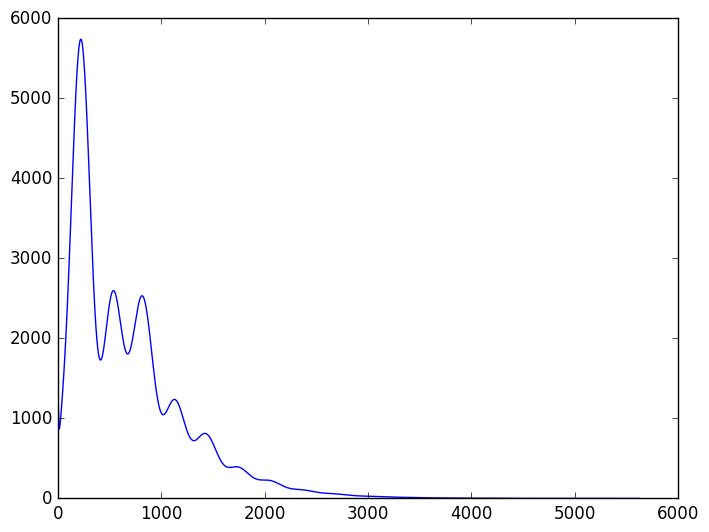

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31efbdb50>

In [35]:
plot(ells, ells.*(ells+1).* rawClTT ./ (2π))

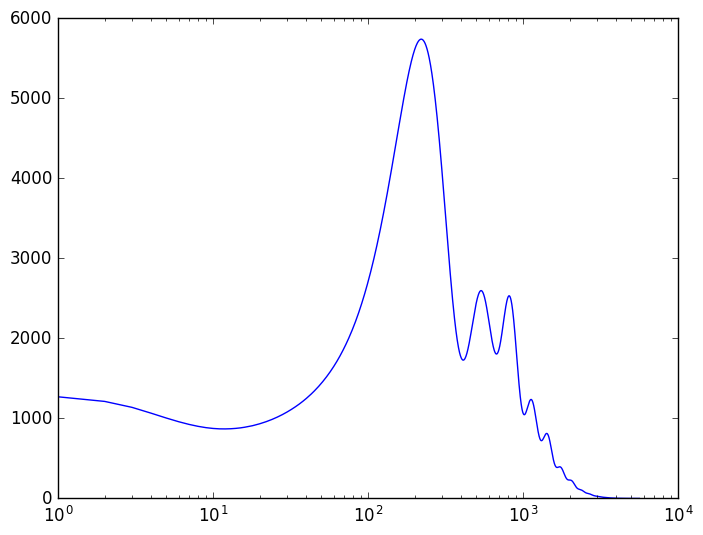

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f5a94d0>

In [36]:
semilogx(ells, ells.*(ells+1).* rawClTT ./ (2π))

## Response to varying the LCDM parameters

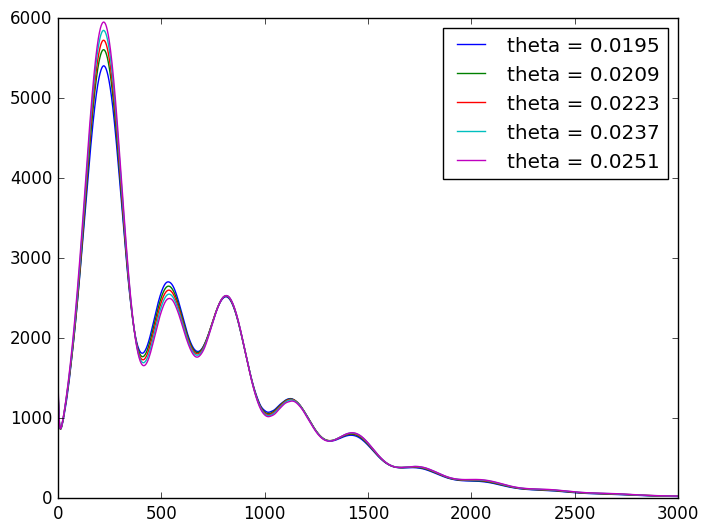

PyObject <matplotlib.legend.Legend object at 0x31f552990>

In [50]:
# Omega matter
μ = 0.0223
σ = 0.00014
l_max = 3000
plt[:copper]()
for θ in linspace(μ-20σ, μ+20σ, 5)
    plot(ells[1:l_max], pico(omega_b = θ)["cl_TT"][1:l_max], label = "theta = $θ")
end
legend(loc = 1)

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x3230a1810>)